In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 1

In [2]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [3]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [4]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [5]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [6]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

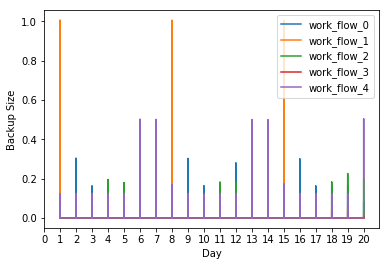

In [7]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])
plt.plot(day_idx[:twenty_days+1], w_0)
plt.plot(day_idx[:twenty_days+1],w_1)
plt.plot(day_idx[:twenty_days+1],w_2)
plt.plot(day_idx[:twenty_days+1],w_3)
plt.plot(day_idx[:twenty_days+1],w_4)
plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

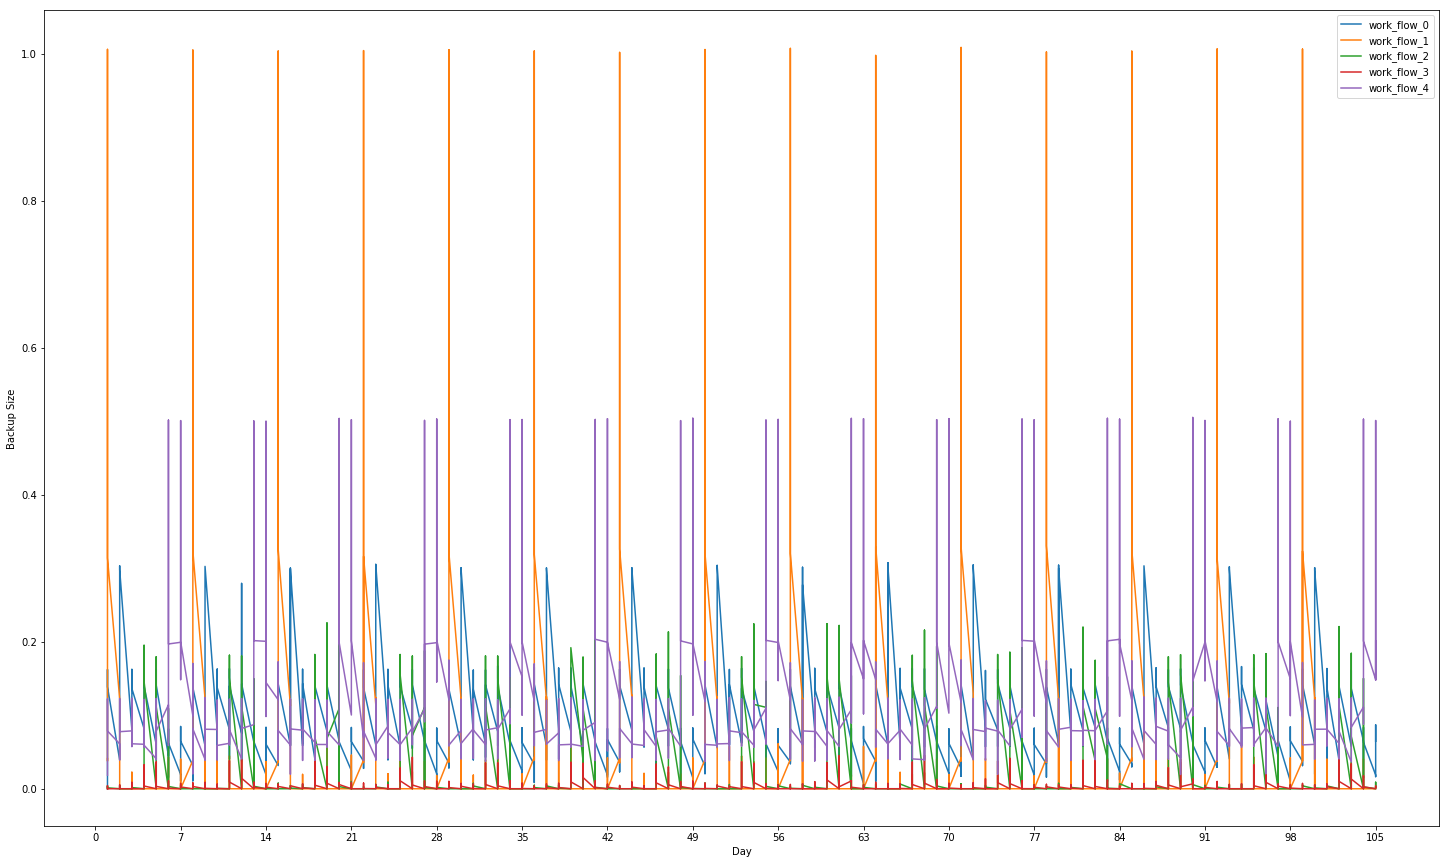

In [8]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.empty(total_idx)
w_1 = np.empty(total_idx)
w_2 = np.empty(total_idx)
w_3 = np.empty(total_idx)
w_4 = np.empty(total_idx)
w_0[:] = np.nan
w_1[:] = np.nan
w_2[:] = np.nan
w_3[:] = np.nan
w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))
plt.plot(day_idx[np.isfinite(w_0)], w_0[np.isfinite(w_0)])
plt.plot(day_idx[np.isfinite(w_1)], w_1[np.isfinite(w_1)])
plt.plot(day_idx[np.isfinite(w_2)], w_2[np.isfinite(w_2)])
plt.plot(day_idx[np.isfinite(w_3)], w_3[np.isfinite(w_3)])
plt.plot(day_idx[np.isfinite(w_4)], w_4[np.isfinite(w_4)])
plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [9]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [11]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [12]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10305695580741615
RMSE Testing for fold 0 = 0.10829782735651984
RMSE Training for fold 1 = 0.10406436126094933
RMSE Testing for fold 1 = 0.09922602551492106
RMSE Training for fold 2 = 0.10330877557229937
RMSE Testing for fold 2 = 0.10611022252252086
RMSE Training for fold 3 = 0.10368314736655823
RMSE Testing for fold 3 = 0.10275504344906856
RMSE Training for fold 4 = 0.10405020270951305
RMSE Testing for fold 4 = 0.09935933530842894
RMSE Training for fold 5 = 0.10183713059469011
RMSE Testing for fold 5 = 0.11824222538500105
RMSE Training for fold 6 = 0.1049044365589395
RMSE Testing for fold 6 = 0.09093647147588342
RMSE Training for fold 7 = 0.10298440621789834
RMSE Testing for fold 7 = 0.10889390552602303
RMSE Training for fold 8 = 0.1044467735774518
RMSE Testing for fold 8 = 0.0955523823565114
RMSE Training for fold 9 = 0.10351082991233827
RMSE Testing for fold 9 = 0.10430980795055292


In [13]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))

Average RMSE Training = 0.1035847019578054
Average RMSE Testing = 0.10336832468454311


#### Scatter Plots

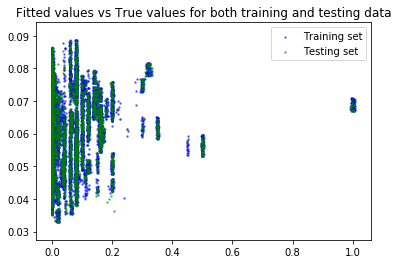

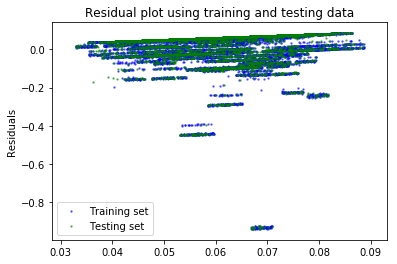

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest

## Neural Network

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

In [17]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [18]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [132]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_relu.append(np.mean(train_rmses))
    avg_test_rmses_relu.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08828075136570991
Average testing RMSE for hidden layer size 2 =  0.10689170590309924
 
Average training RMSE for hidden layer size 5 =  0.10290831652789663
Average testing RMSE for hidden layer size 5 =  0.1032727939822399
 
Average training RMSE for hidden layer size 10 =  0.02886032561674855
Average testing RMSE for hidden layer size 10 =  0.03935513712062509
 
Average training RMSE for hidden layer size 50 =  0.018077162570088397
Average testing RMSE for hidden layer size 50 =  0.05626987561372756
 
Average training RMSE for hidden layer size 100 =  0.017098587765273975
Average testing RMSE for hidden layer size 100 =  0.046802375495210144
 
Average training RMSE for hidden layer size 150 =  0.014962282027769733
Average testing RMSE for hidden layer size 150 =  0.030426449713720254
 
Average training RMSE for hidden layer size 200 =  0.01469230806138131
Average testing RMSE for hidden layer size 200 =  0.026233398975783518
 
Averag

In [136]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_logistic.append(np.mean(train_rmses))
    avg_test_rmses_logistic.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08808108192058792
Average testing RMSE for hidden layer size 2 =  0.08898025441846827
 
Average training RMSE for hidden layer size 5 =  0.09354320464616969
Average testing RMSE for hidden layer size 5 =  0.09472625667393217
 
Average training RMSE for hidden layer size 10 =  0.08822168354719666
Average testing RMSE for hidden layer size 10 =  0.08992037605437428
 
Average training RMSE for hidden layer size 50 =  0.08875912765878816
Average testing RMSE for hidden layer size 50 =  0.09146318545192278
 
Average training RMSE for hidden layer size 100 =  0.08904707935673276
Average testing RMSE for hidden layer size 100 =  0.092093620430008
 
Average training RMSE for hidden layer size 150 =  0.08902637733345754
Average testing RMSE for hidden layer size 150 =  0.0906831563528114
 
Average training RMSE for hidden layer size 200 =  0.08973175371057117
Average testing RMSE for hidden layer size 200 =  0.09440559827728431
 
Average traini

In [134]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_tanh.append(np.mean(train_rmses))
    avg_test_rmses_tanh.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08806051786066574
Average testing RMSE for hidden layer size 2 =  0.1045847037140895
 
Average training RMSE for hidden layer size 5 =  0.0879298714748257
Average testing RMSE for hidden layer size 5 =  0.08996297029032765
 
Average training RMSE for hidden layer size 10 =  0.06343199425209858
Average testing RMSE for hidden layer size 10 =  0.13265719114759794
 
Average training RMSE for hidden layer size 50 =  0.04121000719102465
Average testing RMSE for hidden layer size 50 =  0.06369807817626424
 
Average training RMSE for hidden layer size 100 =  0.03925399427801385
Average testing RMSE for hidden layer size 100 =  0.08738910271003547
 
Average training RMSE for hidden layer size 150 =  0.03134970364100455
Average testing RMSE for hidden layer size 150 =  0.04658124012874803
 
Average training RMSE for hidden layer size 200 =  0.0255650175130193
Average testing RMSE for hidden layer size 200 =  0.050438242504910656
 
Average train

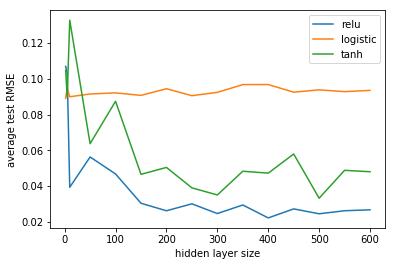

In [138]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [142]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

Best combination: 400 hidden layers with ReLU gives RMSE 0.022235233473332016


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
best_layer_size = 400
best_activation = 'relu'

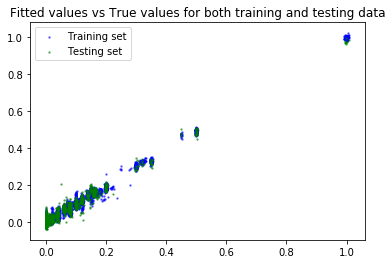

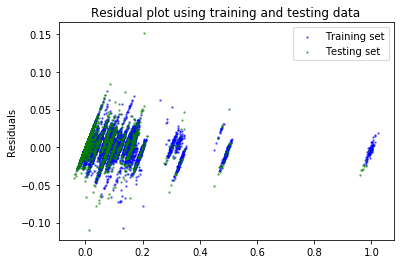

In [22]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, 
                                                    test_size=0.1, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Linear Regression

In [25]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [26]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf0_enc):
    X_train, X_test = data_wf0_enc[trainset], data_wf0_enc[testset]
    y_train, y_test = target_wf0_enc[trainset], target_wf0_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.035835216405880534
Average test RMSE: 0.035856383635549126


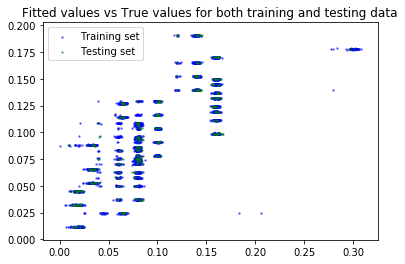

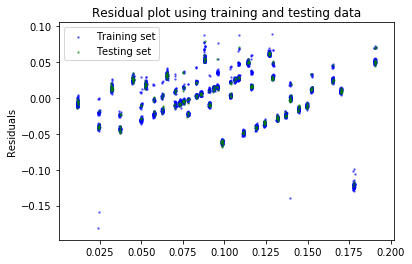

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [31]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf1_enc):
    X_train, X_test = data_wf1_enc[trainset], data_wf1_enc[testset]
    y_train, y_test = target_wf1_enc[trainset], target_wf1_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.14874351053970675
Average test RMSE: 0.14793577104941905


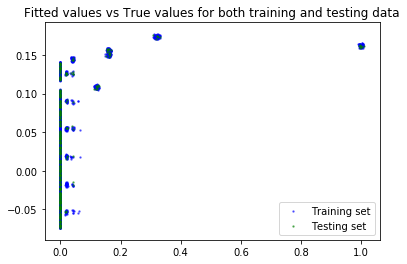

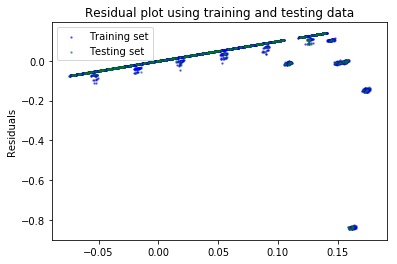

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [33]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf2_enc):
    X_train, X_test = data_wf2_enc[trainset], data_wf2_enc[testset]
    y_train, y_test = target_wf2_enc[trainset], target_wf2_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.04291268216819609
Average test RMSE: 0.04288734965606429


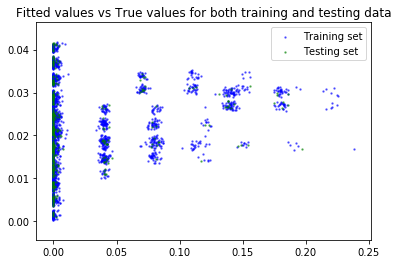

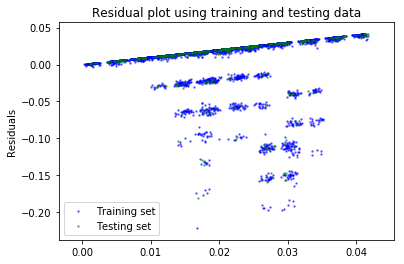

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [35]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf3_enc):
    X_train, X_test = data_wf3_enc[trainset], data_wf3_enc[testset]
    y_train, y_test = target_wf3_enc[trainset], target_wf3_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.0072441743433212065
Average test RMSE: 0.007235033554255374


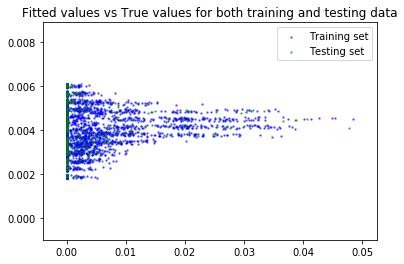

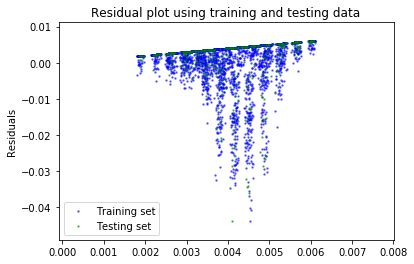

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [37]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf4_enc):
    X_train, X_test = data_wf4_enc[trainset], data_wf4_enc[testset]
    y_train, y_test = target_wf4_enc[trainset], target_wf4_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.08591825005731442
Average test RMSE: 0.0858820485951205


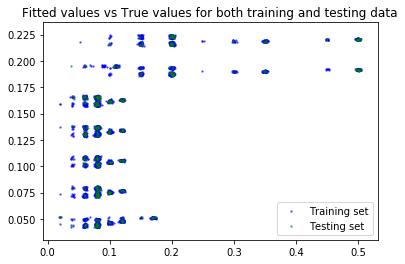

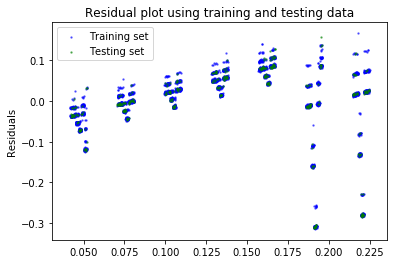

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
degrees = np.arange(2, 11)

In [31]:
# Workflow 0

avg_train_rmse_wf0 = []
avg_test_rmse_wf0 = []
for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf0_enc_poly):
        X_train, X_test = data_wf0_enc_poly[trainset], data_wf0_enc_poly[testset]
        y_train, y_test = target_wf0_enc[trainset], target_wf0_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf0.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf0.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.02951044038920691
Average test RMSE: 0.029613662859018904
 
Polynomial degree = 3
Average train RMSE: 0.02629434670208174
Average test RMSE: 0.02654360601138826
 
Polynomial degree = 4
Average train RMSE: 0.024937018643745208
Average test RMSE: 0.025499661542946674
 
Polynomial degree = 5
Average train RMSE: 0.01820746271582394
Average test RMSE: 0.019017336926334012
 
Polynomial degree = 6
Average train RMSE: 0.01171525197183967
Average test RMSE: 0.012375280473499131
 
Polynomial degree = 7
Average train RMSE: 0.010902552846012988
Average test RMSE: 0.011898845104185183
 
Polynomial degree = 8
Average train RMSE: 0.007997215788659995
Average test RMSE: 0.009304544952191665
 
Polynomial degree = 9
Average train RMSE: 0.007731341503543029
Average test RMSE: 0.009736694267414173
 
Polynomial degree = 10
Average train RMSE: 0.007251467708198773
Average test RMSE: 0.009975921123810533
 


In [32]:
# Workflow 1

avg_train_rmse_wf1 = []
avg_test_rmse_wf1 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf1_enc_poly):
        X_train, X_test = data_wf1_enc_poly[trainset], data_wf1_enc_poly[testset]
        y_train, y_test = target_wf1_enc[trainset], target_wf1_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf1.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf1.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.1297919798456275
Average test RMSE: 0.12901437001453558
 
Polynomial degree = 3
Average train RMSE: 0.11104582035905311
Average test RMSE: 0.11178565667331156
 
Polynomial degree = 4
Average train RMSE: 0.08928418996574214
Average test RMSE: 0.0914781046468365
 
Polynomial degree = 5
Average train RMSE: 0.06541191170101976
Average test RMSE: 0.0685295474351448
 
Polynomial degree = 6
Average train RMSE: 0.04236074638989835
Average test RMSE: 0.04539583156272584
 
Polynomial degree = 7
Average train RMSE: 0.020775863197712335
Average test RMSE: 0.02293924313717588
 
Polynomial degree = 8
Average train RMSE: 0.008123135169090826
Average test RMSE: 0.009242890118840013
 
Polynomial degree = 9
Average train RMSE: 0.005431470185180092
Average test RMSE: 0.006546173587834646
 
Polynomial degree = 10
Average train RMSE: 0.005218040487372939
Average test RMSE: 0.006879435748659682
 


In [33]:
# Workflow 2

avg_train_rmse_wf2 = []
avg_test_rmse_wf2 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf2_enc_poly):
        X_train, X_test = data_wf2_enc_poly[trainset], data_wf2_enc_poly[testset]
        y_train, y_test = target_wf2_enc[trainset], target_wf2_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

    avg_train_rmse_wf2.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf2.append(np.mean(rmse_per_fold_test))    
        
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.038469473772652724
Average test RMSE: 0.0385899539244161
 
Polynomial degree = 3
Average train RMSE: 0.03446847982109015
Average test RMSE: 0.0347421070404023
 
Polynomial degree = 4
Average train RMSE: 0.031820526389148104
Average test RMSE: 0.03240878692268893
 
Polynomial degree = 5
Average train RMSE: 0.02589519473523245
Average test RMSE: 0.026702761741606414
 
Polynomial degree = 6
Average train RMSE: 0.02338932079294727
Average test RMSE: 0.024786646599526285
 
Polynomial degree = 7
Average train RMSE: 0.021178430875482632
Average test RMSE: 0.023021281915845328
 
Polynomial degree = 8
Average train RMSE: 0.019258703944322532
Average test RMSE: 0.022073000233240592
 
Polynomial degree = 9
Average train RMSE: 0.01783915539839428
Average test RMSE: 0.021674232867814305
 
Polynomial degree = 10
Average train RMSE: 0.01700177307045717
Average test RMSE: 0.02254615140908006
 


In [34]:
# Workflow 3

avg_train_rmse_wf3 = []
avg_test_rmse_wf3 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf1_enc_poly):
        X_train, X_test = data_wf3_enc_poly[trainset], data_wf3_enc_poly[testset]
        y_train, y_test = target_wf3_enc[trainset], target_wf3_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf3.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf3.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.006377031805983065
Average test RMSE: 0.006388674574617957
 
Polynomial degree = 3
Average train RMSE: 0.006027201340375219
Average test RMSE: 0.006057563814097352
 
Polynomial degree = 4
Average train RMSE: 0.005465499604893323
Average test RMSE: 0.005535095590058599
 
Polynomial degree = 5
Average train RMSE: 0.0049075522518190395
Average test RMSE: 0.005030658256111796
 
Polynomial degree = 6
Average train RMSE: 0.004583960807540666
Average test RMSE: 0.004780491974409369
 
Polynomial degree = 7
Average train RMSE: 0.004362246022418069
Average test RMSE: 0.004679899551504416
 
Polynomial degree = 8
Average train RMSE: 0.004221260713622764
Average test RMSE: 0.0046885825484952
 
Polynomial degree = 9
Average train RMSE: 0.004122221783108753
Average test RMSE: 0.004854734245825539
 
Polynomial degree = 10
Average train RMSE: 0.003995382505784149
Average test RMSE: 0.00507580979575536
 


In [35]:
# Workflow 4

avg_train_rmse_wf4 = []
avg_test_rmse_wf4 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf4_enc_poly):
        X_train, X_test = data_wf4_enc_poly[trainset], data_wf4_enc_poly[testset]
        y_train, y_test = target_wf4_enc[trainset], target_wf4_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        
    avg_train_rmse_wf4.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf4.append(np.mean(rmse_per_fold_test))        

    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.06918408675730581
Average test RMSE: 0.06936409598352632
 
Polynomial degree = 3
Average train RMSE: 0.06124249793351222
Average test RMSE: 0.061777947254377984
 
Polynomial degree = 4
Average train RMSE: 0.0490612557801161
Average test RMSE: 0.04988803187823269
 
Polynomial degree = 5
Average train RMSE: 0.036489002212836054
Average test RMSE: 0.037640453160571005
 
Polynomial degree = 6
Average train RMSE: 0.026036355453070415
Average test RMSE: 0.027655214825443176
 
Polynomial degree = 7
Average train RMSE: 0.020940695846845426
Average test RMSE: 0.023220613252184677
 
Polynomial degree = 8
Average train RMSE: 0.018430519290132737
Average test RMSE: 0.021598381052572474
 
Polynomial degree = 9
Average train RMSE: 0.016041786064178217
Average test RMSE: 0.0205118139665846
 
Polynomial degree = 10
Average train RMSE: 0.014604656877549999
Average test RMSE: 0.021221582973804595
 


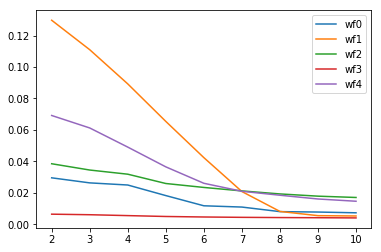

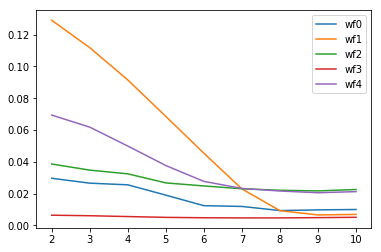

In [36]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [34]:
best_deg = 7


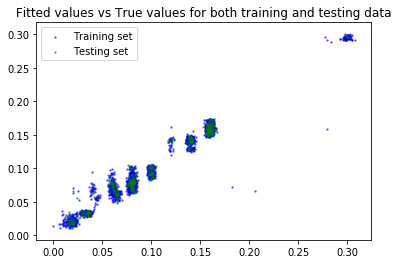

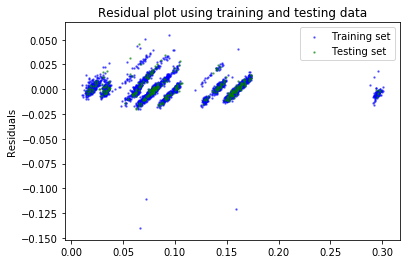

In [35]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc_poly, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

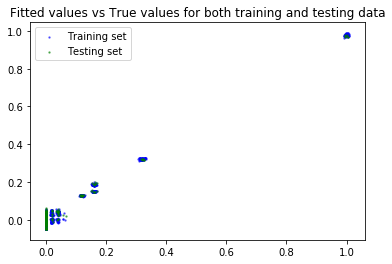

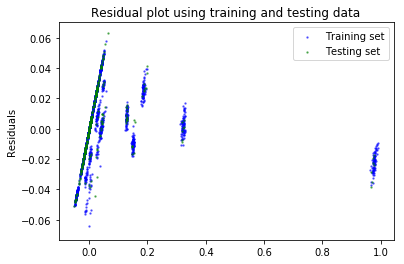

In [36]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc_poly, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

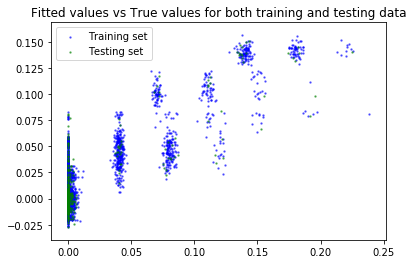

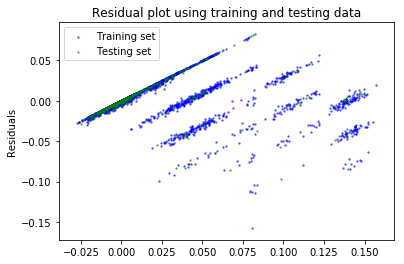

In [38]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc_poly, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

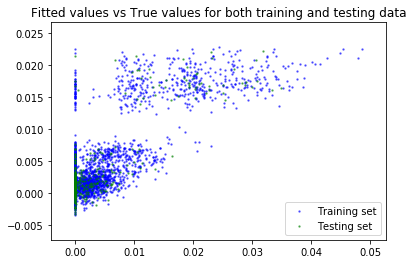

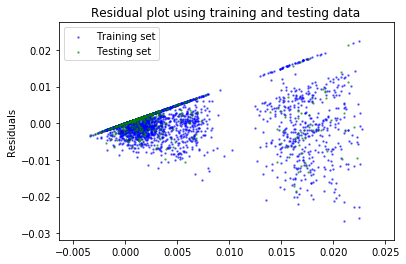

In [39]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc_poly, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

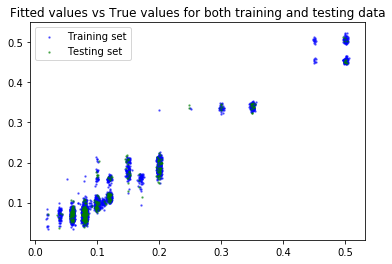

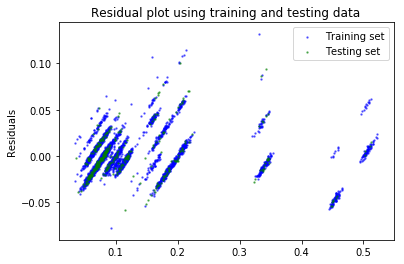

In [40]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc_poly, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

## KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values

In [22]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [32]:
# One hot encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(train_data):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(enc.transform(train_data[trainset]), target_data[trainset])

        predicted_test = knr.predict(enc.transform(train_data[testset]))
        predicted_train = knr.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.mean(train_rmses))
    print('Average testing RMSE for {} neighbors = '.format(i), np.mean(test_rmses))
    print(' ')
    

Average training RMSE for 2 neighbors =  0.02867788589617355
Average testing RMSE for 2 neighbors =  0.02594575798629799
 
Average training RMSE for 3 neighbors =  0.03136059031554087
Average testing RMSE for 3 neighbors =  0.02379359488330635
 
Average training RMSE for 4 neighbors =  0.035645194518587955
Average testing RMSE for 4 neighbors =  0.02352168412113564
 
Average training RMSE for 5 neighbors =  0.03505240653841058
Average testing RMSE for 5 neighbors =  0.02228216101935084
 
Average training RMSE for 6 neighbors =  0.034653932706211275
Average testing RMSE for 6 neighbors =  0.021599501748946197
 
Average training RMSE for 7 neighbors =  0.034140258612036
Average testing RMSE for 7 neighbors =  0.02117718381080623
 
Average training RMSE for 8 neighbors =  0.03360957497364643
Average testing RMSE for 8 neighbors =  0.020584536533204197
 
Average training RMSE for 9 neighbors =  0.03328416345564402
Average testing RMSE for 9 neighbors =  0.0201964064787764
 
Average trainin

In [31]:
# Scalar encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(X_encoded):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(X_encoded[trainset], Y_encoded[trainset])

        predicted_test = knr.predict(X_encoded[testset])
        predicted_train = knr.predict(X_encoded[trainset])
        
        train_rmses.append(np.sqrt(mean_squared_error(Y_encoded[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(Y_encoded[testset], predicted_test)))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.mean(train_rmses))
    print('Average testing RMSE for {} neighbors = '.format(i), np.mean(test_rmses))
    print(' ')
    

Average training RMSE for 2 neighbors =  0.02880732305181837
Average testing RMSE for 2 neighbors =  0.04346226123484685
 
Average training RMSE for 3 neighbors =  0.029217136599226173
Average testing RMSE for 3 neighbors =  0.03614351161712234
 
Average training RMSE for 4 neighbors =  0.027991838565719913
Average testing RMSE for 4 neighbors =  0.033617798600295595
 
Average training RMSE for 5 neighbors =  0.027523328897841426
Average testing RMSE for 5 neighbors =  0.034878721832935014
 
Average training RMSE for 6 neighbors =  0.029694173097403374
Average testing RMSE for 6 neighbors =  0.03854829572008403
 
Average training RMSE for 7 neighbors =  0.03358349243106502
Average testing RMSE for 7 neighbors =  0.042689994739705035
 
Average training RMSE for 8 neighbors =  0.037278028155526985
Average testing RMSE for 8 neighbors =  0.04524537581782938
 
Average training RMSE for 9 neighbors =  0.039799637409272434
Average testing RMSE for 9 neighbors =  0.04667608513518893
 
Average

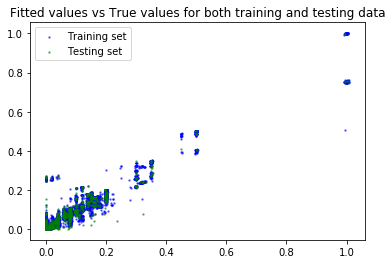

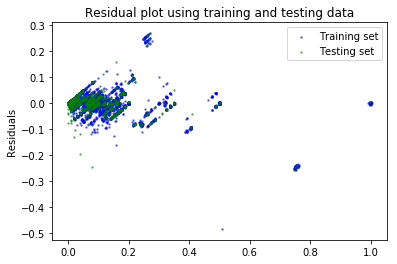

In [33]:
knr = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=0)
knr.fit(X_train, y_train)

model_scatter_plots(knr, X_train, y_train, X_test, y_test)